In [1]:
import pandas as pd
from  sklearn import datasets

In [3]:
digits = datasets.load_digits()

In [5]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [6]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
digits.target[0]

0

## Build our machine vision model

    1. create SVM classifieer
    2  run it in data

In [10]:
from sklearn.svm import SVC

In [12]:
# pro tip
from sklearn.model_selection import cross_val_score

In [18]:
#cross_val_score(cross_val_score(n_estimators = 10), X, y, cv=3)
#df = pd.DataFrame(data=digits)

X = digits.data
y = digits.target



In [19]:
df = pd.DataFrame(data=X)

In [20]:
cross_val_score(SVC(), X, y, cv=3)

array([0.39368771, 0.41068447, 0.45973154])

In [22]:
digits_class = SVC(gamma=.001, C=100)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = .33)

In [25]:
digits_class.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
candiate = digits.data[1600]

In [30]:
import matplotlib.pyplot as plt

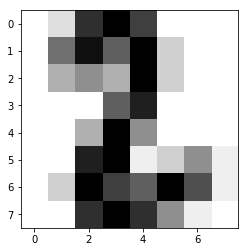

In [33]:
plt.imshow(digits.images[1600], cmap =plt.cm.gray_r, interpolation='nearest')
plt.show()

In [34]:
digits_class.score(X_test,y_test)

0.9915824915824916

Automatic parameter selection...

In [35]:
from sklearn.model_selection import GridSearchCV

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
pgrid = { 'n_estimators': [2,3,4,5,10,15,20,25],'max_features': ['auto', 'log2'], 'criterion': ['gini', 'entropy']}

In [46]:
rf = RandomForestClassifier()

In [45]:
clf  = GridSearchCV(rf, pgrid)

In [48]:
clf.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [2, 3, 4, 5, 10, 15, 20, 25], 'max_features': ['auto', 'log2'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [51]:
clf.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 25}

In [52]:
clf.grid_scores_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.70006, std: 0.02759, params: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 2},
 mean: 0.79188, std: 0.02507, params: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 3},
 mean: 0.85364, std: 0.01213, params: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 4},
 mean: 0.85810, std: 0.01106, params: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 5},
 mean: 0.89260, std: 0.00894, params: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10},
 mean: 0.91931, std: 0.01596, params: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 15},
 mean: 0.92154, std: 0.01385, params: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 20},
 mean: 0.93322, std: 0.01299, params: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 25},
 mean: 0.70228, std: 0.01458, params: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 2},
 mean: 0.78464, std: 0.01485, params: {'criterion': 'gini', 